| Thông tin sinh viên |                           |
|---------------------|---------------------------|
| Họ và tên           | Lê Phú Trường            |
| Mã số sinh viên     | 22110245                 |
| Môn học             | Giải tích số    |
| Trường              | Trường Đại học Khoa học Tự nhiên - ĐHQG TP.HCM|

# Bài tập lập trình môn Giải tích số

Các thư viện cần thiết:

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

## 2. Phương pháp xấp xỉ đạo hàm

Tôi sẽ dùng Python để tìm nghiệm xấp xỉ cho bài toán biên Dirichlet.
- Input : `self, f, Gx, Hx, Fx, a, b, ua, ub, h`.
    - `f, Gx, Hx, Fx` : các hàm số trong đề bài.
    - `a, b` : đoạn $[a, b]$ chứa nghiệm.
    - `ua, ub` : giá trị biên.
    - `h` : bước xấp xỉ.
- Ouput : giá trị nghiệm xấp xỉ của bài toán. Sử dụng hàm $\text{plot}$ để vẽ nghiệm xấp xỉ và nghiệm chính xác trên cùng một đồ thị, chú thích hình vẽ đầy đủ.

In [ ]:
class ApproximationDirichlet:
    """
    ApproximationDirichlet is a class that solves the boundary value problem
    y''(x) + G(x)y'(x) + H(x)y(x) = F(x), a <= x <= b, y(a) = ua, y(b) = ub
    using the finite difference method.

    Parameters
    ----------
    f : function
        The actual solution to the boundary value problem.
    Gx : function
        The function G(x) in the boundary value problem.
    Hx : function
        The function H(x) in the boundary value problem.
    Fx : function
        The function F(x) in the boundary value problem.
    a : float
        The left boundary of the interval.
    b : float
        The right boundary of the interval.
    ua : float
        The left boundary condition.
    ub : float
        The right boundary condition.
    h : float
        The step size.

    Methods
    -------
    solve() -> np.ndarray:
        Solves the boundary value problem using the finite difference method.
    absolute_error() -> float:
        Returns the absolute error of the approximation.
    relative_error() -> float:
        Returns the relative error of the approximation.
    order_of_accuracy() -> float:
        Returns the order of accuracy of the approximation.
    plot() -> None:
        Plots the approximation and the actual solution.
    """

    def __init__(self, f, Gx, Hx, Fx, a, b, ua, ub, h):
        self.f = f
        self.Gx = Gx
        self.Hx = Hx
        self.Fx = Fx
        self.a = a
        self.b = b
        self.ua = ua
        self.ub = ub
        self.h = h
        self.n = int((b - a) / h) - 1

        self.x = np.linspace(a, b, self.n + 2)
        self.A = np.zeros((self.n, self.n))
        self.b_vec = np.zeros(self.n)
        self.y = np.zeros(self.n + 2)
        self.y[0] = ua
        self.y[-1] = ub

    def solve(self) -> np.ndarray:
        for i in range(1, self.n + 1):
            xi = self.x[i]
            hi = self.h
            if i == 1:
                self.A[i-1, i-1] = self.Hx(xi) * hi**2 - 2
                self.A[i-1, i] = 1 + self.Gx(xi) * hi / 2
                self.b_vec[i-1] = hi**2 * self.Fx(xi) - self.ua * (1 - self.Gx(xi) * hi / 2)
            elif i == self.n:
                self.A[i-1, i-2] = 1 - self.Gx(xi) * hi / 2
                self.A[i-1, i-1] = self.Hx(xi) * hi**2 - 2
                self.b_vec[i-1] = hi**2 * self.Fx(xi) - self.ub * (1 + self.Gx(xi) * hi / 2)
            else:
                self.A[i-1, i-2] = 1 - self.Gx(xi) * hi / 2
                self.A[i-1, i-1] = self.Hx(xi) * hi**2 - 2
                self.A[i-1, i] = 1 + self.Gx(xi) * hi / 2
                self.b_vec[i-1] = hi**2 * self.Fx(xi)

        self.y[1:self.n + 1] = np.linalg.solve(self.A, self.b_vec)
        return self.y

    def absolute_error(self) -> float:
        return np.linalg.norm(self.y - self.f(self.x))

    def relative_error(self) -> float:
        return np.linalg.norm(self.y - self.f(self.x)) / np.linalg.norm(self.f(self.x))

    def order_of_accuracy(self) -> float:
        h = self.h
        h2 = h / 2

        approx_h = ApproximationDirichlet(self.f, self.Gx, self.Hx, self.Fx, self.a, self.b, self.ua, self.ub, h)
        approx_h2 = ApproximationDirichlet(self.f, self.Gx, self.Hx, self.Fx, self.a, self.b, self.ua, self.ub, h2)

        approx_h.solve()
        approx_h2.solve()

        f_exact = self.f(self.x)
        f_exact_h2 = approx_h2.f(approx_h2.x)

        return -np.log(np.linalg.norm(approx_h2.y - f_exact_h2) / np.linalg.norm(approx_h.y - f_exact)) / np.log(approx_h2.n / approx_h.n)

    def plot(self) -> None:
        fig, axs = plt.subplots(1, 3, figsize=(15, 5))
        axs[0].plot(self.x, self.y, color='b', label='Approximation')
        axs[0].set_title('Approximation')
        axs[0].set_xlabel('x')
        axs[0].set_ylabel('y')
        axs[0].legend()

        axs[1].plot(self.x, self.f(self.x), color='r', label='Actual solution')
        axs[1].set_title('Actual solution')
        axs[1].set_xlabel('x')
        axs[1].legend()

        axs[2].plot(self.x, self.y, color='b', label='Approximation')
        axs[2].plot(self.x, self.f(self.x), color='r', label='Actual solution')
        axs[2].set_title('Comparison')
        axs[2].set_xlabel('x')
        axs[2].legend()

        plt.tight_layout()
        plt.show()

### Yêu cầu 2.7
Xét bài toán điều kiện biên Dirichlet như sau:
$$\left\{
    \begin{array}{ll}
        y'' = y' +2y +\cos{x}, 0 \leq x \leq \dfrac{\pi}{2},\\
        y(0)= -0.3,\\
        y\left(\dfrac{\pi}{2}\right) = -0.1.
    \end{array}
\right.$$

có nghiệm chính xác $y(x) = -\dfrac{1}{10} (\sin{x} +3\cos{x})$. Sử dụng xấp xỉ đạo hàm để tìm nghiệm xấp xỉ với $h = \dfrac{\pi}{20}$.

Approximate value:  [-0.3        -0.31197884 -0.31626005 -0.3127416  -0.30151343 -0.28285539
 -0.25723058 -0.22527415 -0.187778   -0.14567166 -0.1       ]


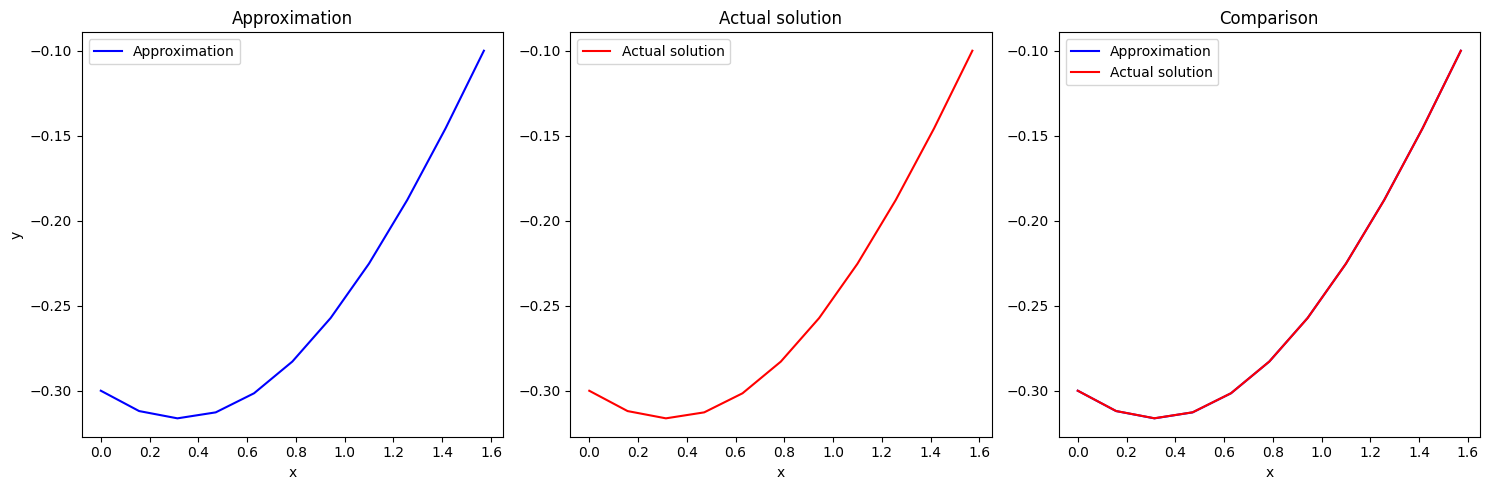

In [ ]:
x = sp.symbols('x')
f = lambda x: -1/10 * (np.sin(x) + 3 * np.cos(x))
Gx = lambda x: -1
Hx = lambda x: -2
Fx = lambda x: np.cos(x)
a = 0
b = np.pi / 2
ua = -0.3
ub = -0.1
h = np.pi / 20

approximation = ApproximationDirichlet(f, Gx, Hx, Fx, a, b, ua, ub, h)
y_approx = approximation.solve()
print('Approximate value: ', y_approx)

approximation.plot()

In [ ]:
print('Absolute error: ', approximation.absolute_error())
print('Relative error: ', approximation.relative_error())
print('Order of accuracy: ', approximation.order_of_accuracy())

Absolute error:  8.7633411008115e-05
Relative error:  0.00010191223097416988
Order of accuracy:  1.3865563326300536


### Yêu cầu 2.8

Xét bài toán điều kiện biên Dirichlet như sau:
$$\left\{
    \begin{array}{ll}
            y'' + y = 0, \qquad 0 \leq x \leq \dfrac{\pi}{4},\\
        y(0)= 1,\\
        y\left(\dfrac{\pi}{4}\right)  = 1.
    \end{array}
\right.$$

có nghiệm chính xác $y(x) = \cos{x} + (\sqrt{2} - 1)\sin{x}$. Sử dụng xấp xỉ đạo hàm để tìm nghiệm xấp xỉ với $h= \dfrac{\pi}{20}$.

Approximate value:  [1.         1.05260081 1.07922974 1.07922974 1.05260081 1.        ]


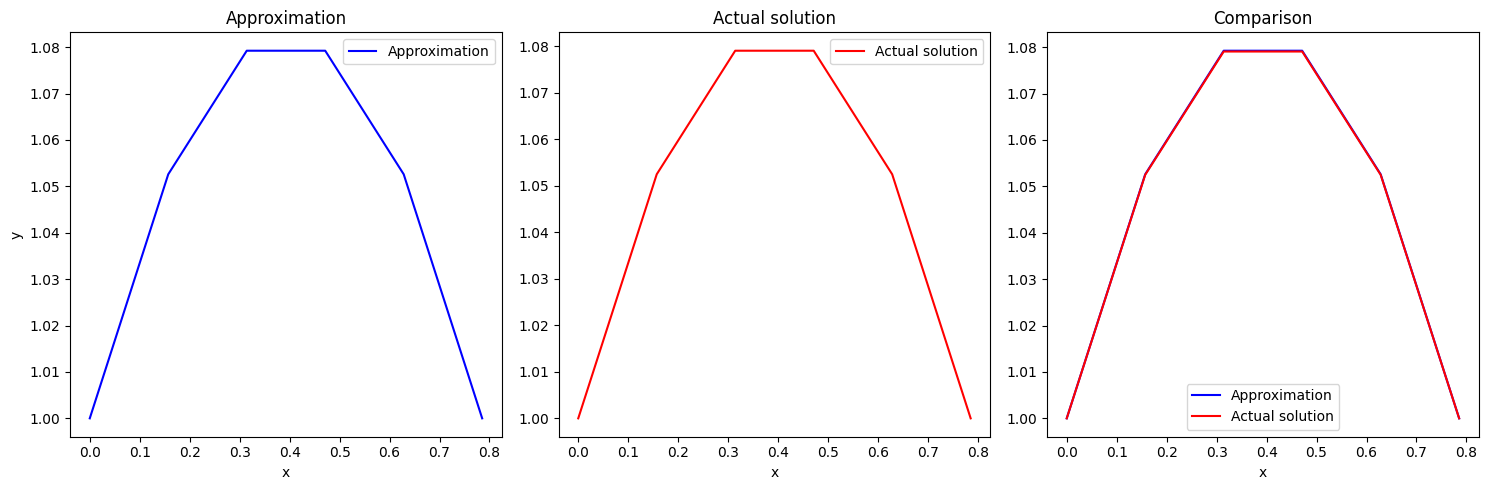

In [ ]:
x = sp.symbols('x')
f = lambda x: np.cos(x) + (np.sqrt(2) - 1) * np.sin(x)
Gx = lambda x: 0
Hx = lambda x: 1
Fx = lambda x: 0
a = 0
b = np.pi / 4
ua = 1
ub = 1
h = np.pi / 20

approximation = ApproximationDirichlet(f, Gx, Hx, Fx, a, b, ua, ub, h)
y_approx = approximation.solve()
print('Approximate value: ', y_approx)

approximation.plot()

In [ ]:
print('Absolute error: ', approximation.absolute_error())
print('Relative error: ', approximation.relative_error())
print('Order of accuracy: ', approximation.order_of_accuracy())

Absolute error:  0.00029533596130767087
Relative error:  0.00011544866698055672
Order of accuracy:  1.284511352092607


## 4. Xấp xỉ tích phân bằng các phương pháp Newton-Cotes

Tôi sẽ dùng Python viết các hàm `Trapezoidal`, `Simpson`, `Composite_Trapezoidal`, `Composite_Simpson` để tính xấp xỉ giá trị $\displaystyle\int_{a}^{b} f(x)dx$.

- Input : `f, a, b, n`.
    - `f` : hàm số cần tính tích phân.
    - `a, b` : đoạn $[a, b]$ cần tính tích phân.
    - `n` (tùy vào trường hợp cụ thể): số đoạn chia nhỏ đoạn $[a, b]$.

- Output: giá trị xấp xỉ của tích phân.

In [ ]:
def Trapezoidal(f, a, b) -> float:
    return (b - a) / 2 * (f(a) + f(b))

def Simpson(f, a, b) -> float:
    return (b - a) / 6 * (f(a) + 4 * f((a + b) / 2) + f(b))

def Composite_Trapezoidal(f, a, b, n) -> float:
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    return h / 2 * (f(a) + 2 * np.sum(f(x[1:-1])) + f(b))

def Composite_Simpson(f, a, b, n) -> float:
    if (n % 2 != 0):
        raise ValueError('n must be even')

    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    return h/3 * (f(a) + 2 * sum([f(x[2*j]) for j in range(1, n//2)]) + 4 * sum([f(x[2*j - 1]) for j in range(1, n//2 + 1)]) + f(b))

### Yêu cầu 4.7

Sử dụng quy tắc Trapezoidal , quy tắc Simpson  để xấp xỉ các tích phân sau:
\begin{align*}
    a) & \int_{0}^{\pi/4} e^{3x}\sin{(2x)}dx & b) & \int_{-0.25}^{0.25} (\cos{x})^2 dx & c) & \int_{0}^{0.35} \dfrac{2}{x^2 - 4} dx \\
    d) & \int_{0.75}^{1.3} ((\sin{x})^2 -2x\sin{x} +1)dx &e) & \int_{e}^{e+1} \dfrac{1}{x\ln{x}} dx & f) &  \int_{-0.5}^{0} x\ln{(x+1)} dx
\end{align*}

In [ ]:
# a)
f = lambda x: np.exp(3 * x) * np.sin(2 * x)
a = 0; b = np.pi / 4

print('a)')
print('Trapezoidal rule: ', Trapezoidal(f, a, b))
print('Simpson rule: ', Simpson(f, a, b))

a)
Trapezoidal rule:  4.143259655194083
Simpson rule:  2.5836964032474845


In [ ]:
# b)
f = lambda x: np.cos(x)**2
a = -0.25; b = 0.25

print('b)')
print('Trapezoidal rule: ', Trapezoidal(f, a, b))
print('Simpson rule: ', Simpson(f, a, b))

b)
Trapezoidal rule:  0.46939564047259313
Simpson rule:  0.4897985468241977


In [ ]:
# c)
f = lambda x: 2 / (x**2 - 4)
a = 0; b = 0.35

print('c)')
print('Trapezoidal rule: ', Trapezoidal(f, a, b))
print('Simpson rule: ', Simpson(f, a, b))

c)
Trapezoidal rule:  -0.17776434558349452
Simpson rule:  -0.17682156924372924


In [ ]:
# d)
f = lambda x: (np.sin(x)**2 - 2*x*np.sin(x) + 1)
a = 0.75; b = 1.3

print('d)')
print('Trapezoidal rule: ', Trapezoidal(f, a, b))
print('Simpson rule: ', Simpson(f, a, b))

d)
Trapezoidal rule:  -0.037024252723997224
Simpson rule:  -0.020271589910295148


In [ ]:
# e)
f = lambda x: 1 / (x * np.log(x))
a = np.exp(1); b = np.exp(1) + 1

print('e)')
print('Trapezoidal rule: ', Trapezoidal(f, a, b))
print('Simpson rule: ', Simpson(f, a, b))

e)
Trapezoidal rule:  0.28633417247833504
Simpson rule:  0.2726704524449636


In [ ]:
# f)
f = lambda x: x * np.log(x + 1)
a = -0.5; b = 0

print('f)')
print('Trapezoidal rule: ', Trapezoidal(f, a, b))
print('Simpson rule: ', Simpson(f, a, b))

f)
Trapezoidal rule:  0.08664339756999316
Simpson rule:  0.05285463856097945


### Yêu cầu 4.8

Sử dụng   quy tắc Composite Simpson và   Composite Trapezoidal  để tính giá trị xấp xỉ tích phân sau với $n = 4, 8, 16, 32$:
\begin{align*}
    a) & \int_{0}^{\pi} x^2 \cos{(x)} dx  \, & b) & \int_{-0.5}^{0.5} \cos{^2(x)}  dx  \\
     c) & \int_{e}^{e+2} \dfrac{1}{x\ln{x}} dx   & d) & \int_{0}^{3\pi/8} \tan x  dx  
\end{align*}


In [ ]:
# Set the list of n values
n = [4, 18, 12, 32]

In [ ]:
# a)
f = lambda x: x**2 * np.cos(x)
a = 0; b = np.pi

print('a)')
print('Composite Trapezoidal rule with:')
for idx, i in enumerate(n):
    print(' - n =', i, ': ', Composite_Trapezoidal(f, a, b, i))

print('\nComposite Simpson rule with:')
for idx, i in enumerate(n):
    print(' - n =', i, ': ', Composite_Simpson(f, a, b, i))

a)
Composite Trapezoidal rule with:
 - n = 4 :  -6.616378147535766
 - n = 18 :  -6.29915936020792
 - n = 12 :  -6.3191955192250395
 - n = 32 :  -6.288234334647795

Composite Simpson rule with:
 - n = 4 :  -6.237981140022703
 - n = 18 :  -6.283087545919187
 - n = 12 :  -6.282686619625665
 - n = 32 :  -6.283175560445785


In [ ]:
# b)
f = lambda x: np.cos(x)**2
a = -0.5; b = 0.5

print('b)')
print('Composite Trapezoidal rule with:')
for idx, i in enumerate(n):
    print(' - n =', i, ': ', Composite_Trapezoidal(f, a, b, i))

print('\nComposite Simpson rule with:')
for idx, i in enumerate(n):
    print(' - n =', i, ': ', Composite_Simpson(f, a, b, i))

b)
Composite Trapezoidal rule with:
 - n = 4 :  0.9119334287061107
 - n = 18 :  0.9203025478679936
 - n = 12 :  0.919761116463509
 - n = 32 :  0.9205985253184711

Composite Simpson rule with:
 - n = 4 :  0.9208860461191357
 - n = 18 :  0.9207358491878563
 - n = 12 :  0.9207373019499148
 - n = 32 :  0.9207355280867305


In [ ]:
# c)
f = lambda x: 1 / (x * np.log(x))
a = np.exp(1); b = np.exp(1) + 2

print('c)')
print('Composite Trapezoidal rule with:')
for idx, i in enumerate(n):
    print(' - n =', i, ': ', Composite_Trapezoidal(f, a, b, i))

print('\nComposite Simpson rule with:')
for idx, i in enumerate(n):
    print(' - n =', i, ': ', Composite_Simpson(f, a, b, i))

c)
Composite Trapezoidal rule with:
 - n = 4 :  0.44378227536392834
 - n = 18 :  0.43941592112926003
 - n = 12 :  0.43970224574564687
 - n = 32 :  0.43925916645289453

Composite Simpson rule with:
 - n = 4 :  0.4393652991936503
 - n = 18 :  0.4391870859550852
 - n = 12 :  0.43918914724111563
 - n = 32 :  0.4391866223206545


In [ ]:
# d)
f = lambda x: np.tan(x)
a = 0; b = 3 * np.pi / 8

print('d)')
print('Composite Trapezoidal rule with:')
for idx, i in enumerate(n):
    print(' - n =', i, ': ', Composite_Trapezoidal(f, a, b, i))

print('\nComposite Simpson rule with:')
for idx, i in enumerate(n):
    print(' - n =', i, ': ', Composite_Simpson(f, a, b, i))

d)
Composite Trapezoidal rule with:
 - n = 4 :  1.0005390312299143
 - n = 18 :  0.9626214728404974
 - n = 12 :  0.9651971130745052
 - n = 32 :  0.9612048556044326

Composite Simpson rule with:
 - n = 4 :  0.9658406106369494
 - n = 18 :  0.96057118586623
 - n = 12 :  0.9606608771080177
 - n = 32 :  0.9605496831175793


## 5. Xấp xỉ tích phân bằng các công thức cầu phương Gauss

### Yêu cầu 5.7

Dùng Python vẽ hình các hàm trong *Yêu cầu 5.1*. Sử dụng các lệnh `xlabel, ylabel, legend, title, ...` để chú thích hình vẽ đầy đủ.

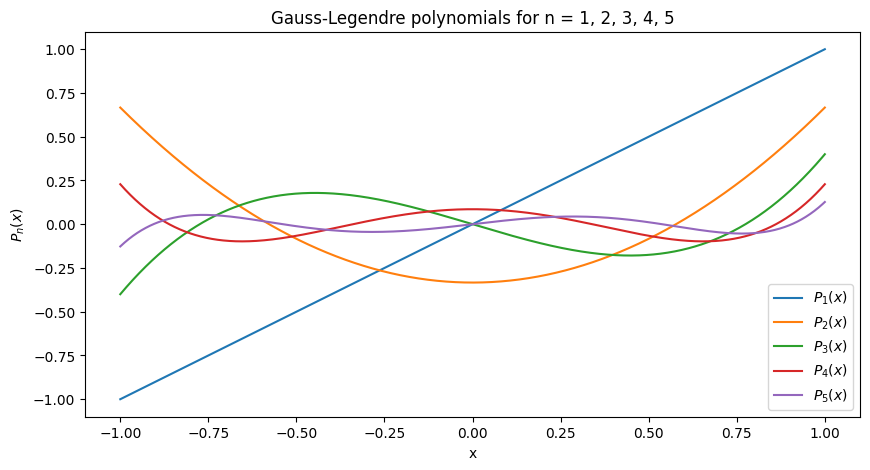

In [ ]:
# Gauss-Legendre quadrature

x = np.linspace(-1, 1, 1000)

P_1 = x
P_2 = x**2 - 1/3
P_3 = x**3 - 3/5*x
P_4 = x**4 - 6/7*x**2 + 3/35
P_5 = x**5 - 10/9*x**3 + 5/21*x

plt.figure(figsize=(10, 5))
plt.plot(x, P_1, label=r'$P_1(x)$')
plt.plot(x, P_2, label=r'$P_2(x)$')
plt.plot(x, P_3, label=r'$P_3(x)$')
plt.plot(x, P_4, label=r'$P_4(x)$')
plt.plot(x, P_5, label=r'$P_5(x)$')
plt.title('Gauss-Legendre polynomials for n = 1, 2, 3, 4, 5')
plt.xlabel('x')
plt.ylabel(r'$P_n(x)$')
plt.legend()
plt.show()

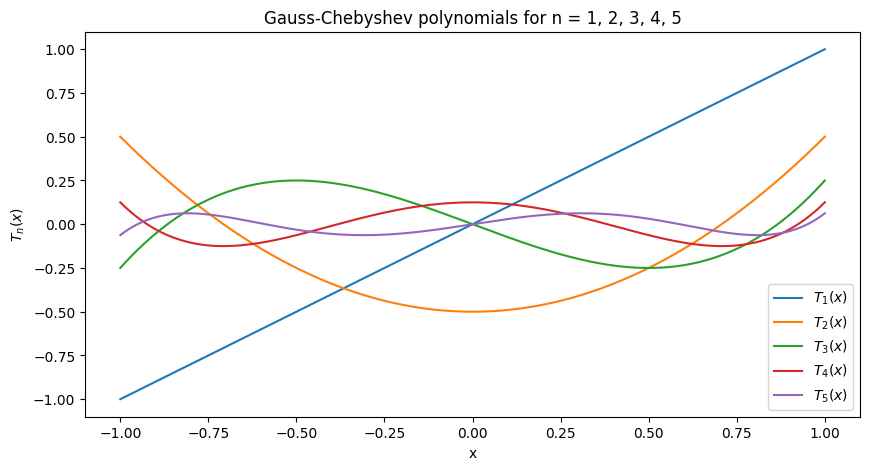

In [ ]:
# Gauss-Chebyshev quadrature

x = np.linspace(-1, 1, 1000)

T_1 = x
T_2 = x**2 - 1/2
T_3 = x**3 - 3/4*x
T_4 = x**4 - x**2 + 1/8
T_5 = x**5 - 5/4*x**3 + 5/16*x

plt.figure(figsize=(10, 5))
plt.plot(x, T_1, label=r'$T_1(x)$')
plt.plot(x, T_2, label=r'$T_2(x)$')
plt.plot(x, T_3, label=r'$T_3(x)$')
plt.plot(x, T_4, label=r'$T_4(x)$')
plt.plot(x, T_5, label=r'$T_5(x)$')
plt.title('Gauss-Chebyshev polynomials for n = 1, 2, 3, 4, 5')
plt.xlabel('x')
plt.ylabel(r'$T_n(x)$')
plt.legend()
plt.show()

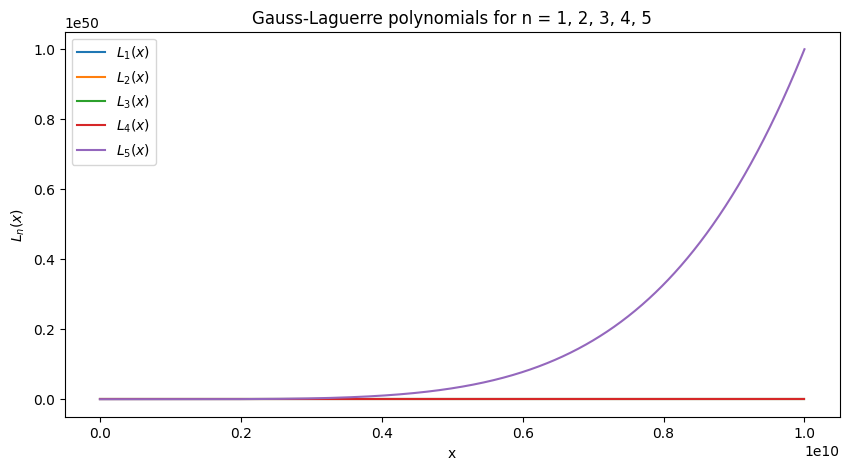

In [ ]:
# Gauss-Laguerre quadrature

x = np.linspace(0, 10**10, 1000)

L_1 = x - 1
L_2 = x**2 - 4*x + 2
L_3 = x**3 - 9*x**2 + 18*x - 6
L_4 = x**4 - 16*x**3 + 72*x**2 - 96*x + 24
L_5 = x**5 - 25*x**4 + 200*x**3 - 600*x**2 + 600*x - 120

plt.figure(figsize=(10, 5))
plt.plot(x, L_1, label=r'$L_1(x)$')
plt.plot(x, L_2, label=r'$L_2(x)$')
plt.plot(x, L_3, label=r'$L_3(x)$')
plt.plot(x, L_4, label=r'$L_4(x)$')
plt.plot(x, L_5, label=r'$L_5(x)$')
plt.title('Gauss-Laguerre polynomials for n = 1, 2, 3, 4, 5')
plt.xlabel('x')
plt.ylabel(r'$L_n(x)$')
plt.legend()
plt.show()

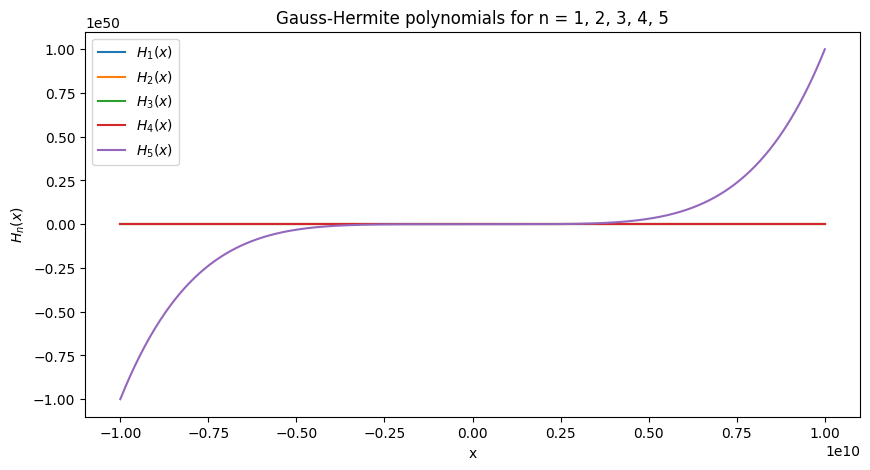

In [ ]:
# Gauss-Hermite quadrature

x = np.linspace(-10**10, 10**10, 1000)

H_1 = x
H_2 = x**2 - 1/2
H_3 = x**3 - 3/2*x
H_4 = x**4 - 3*x**2 + 3/4
H_5 = x**5 - 5*x**3 + 15/4*x

plt.figure(figsize=(10, 5))
plt.plot(x, H_1, label=r'$H_1(x)$')
plt.plot(x, H_2, label=r'$H_2(x)$')
plt.plot(x, H_3, label=r'$H_3(x)$')
plt.plot(x, H_4, label=r'$H_4(x)$')
plt.plot(x, H_5, label=r'$H_5(x)$')
plt.title('Gauss-Hermite polynomials for n = 1, 2, 3, 4, 5')
plt.xlabel('x')
plt.ylabel(r'$H_n(x)$')
plt.legend()
plt.show()

### Yêu cầu 5.8

Dùng Python viết các function `Gauss_Legendre`, `Gauss_Chebyshev`, `Gauss_Laguerre`, `Gauss_Hermite` cho bậc đa thức $n=1,2,3,4,5$ để tính giá trị xấp xỉ tích phân của các *Yêu cầu 4, 5 và 6*.

Trước tiên tôi sẽ xây dựng function `orthogonal_polynomials` cùng với `inner_product` để tạo ra các hàm bậc đa thức cần thiết.

In [ ]:
def inner_product(w, f, g, a, b) -> float:
    """
    Returns the inner product of two functions f and g with respect to the weight function w on the interval [a, b].

    Parameters
    ----------
    w : function
        The weight function.
    f : function
        The first function.
    g : function
        The second function.
    a : float
        The left boundary of the interval.
    b : float
        The right boundary of the interval.

    Returns
    -------
    float
        The inner product of f and g with respect to the weight function w on the interval [a, b] using sympy.
    """
    x = sp.symbols('x')
    return float(sp.integrate(w * f * g, (x, a, b)))

def orthogonal_polynomials(n, poly_type) -> dict:
    """
    Returns the first n orthogonal polynomials of the specified type.

    Parameters
    ----------
    n : int
        The number of orthogonal polynomials to return.
    poly_type : str
        The type of orthogonal polynomials to return. Can be 'Legendre', 'Chebyshev', 'Laguerre', or 'Hermite'.

    Returns
    -------
    dict
        A dictionary containing the orthogonal polynomials, a_n, and b_n for the specified type of orthogonal polynomials.

    Examples
    --------
    >>> orthogonal_polynomials(3, 'Legendre')
    {'Polynomials': [1, x, x**2 - 1/3, x*(x**2 - 3/5)],
    'a_n': [nan, 0, 0, 0],
    'b_n': [nan, nan, 1/3, 4/15]}
    """
    x = sp.symbols('x')

    if poly_type == 'Legendre':
        w = 1
        a, b = -1, 1
    elif poly_type == 'Chebyshev':
        w = 1 / sp.sqrt(1 - x**2)
        a, b = -1, 1
    elif poly_type == 'Laguerre':
        w = 1 / sp.exp(x)
        a, b = 0, sp.oo
    elif poly_type == 'Hermite':
        w = 1 / sp.exp(x**2)
        a, b = -sp.oo, sp.oo
    else:
        raise ValueError("Invalid polynomial type. Choose from 'Legendre', 'Chebyshev', 'Laguerre', or 'Hermite'.")

    P_n = [1, x - inner_product(w, x, 1, a, b) / inner_product(w, 1, 1, a, b)]
    a_n = [np.NaN, inner_product(w, x, 1, a, b) / inner_product(w, 1, 1, a, b)]
    b_n = [np.NaN, np.NaN]

    for i in range(2, n + 1):
        a_n.append(inner_product(w, x * P_n[i - 1], P_n[i - 1], a, b) / inner_product(w, P_n[i - 1], P_n[i - 1], a, b))
        b_n.append(inner_product(w, x * P_n[i - 1], P_n[i - 2], a, b) / inner_product(w, P_n[i - 2], P_n[i - 2], a, b))
        P_n.append((x - a_n[i]) * P_n[i - 1] - b_n[i] * P_n[i - 2])

    return {'Polynomials': [sp.simplify(P_i) for P_i in P_n], 'a_n': a_n, 'b_n': b_n}

- Xây dựng hàm `Gauss_Legendre` cho *Yêu cầu 5.4:*

In [ ]:
def Lagrange_interpolation(x, x_arr, i, a, b) -> float:
    """
    Computes the Lagrange interpolation polynomial and integrates it over [a, b].

    Parameters
    ----------
    x : sympy.Symbol
        The variable of the polynomial.
    x_arr : list
        The list of x points.
    i : int
        The index of the current point.
    a : float
        The left boundary of the interval.
    b : float
        The right boundary of the interval.

    Returns
    -------
    float
        The integral of the Lagrange interpolation polynomial over [a, b].
    """
    n = len(x_arr)
    return float(sp.integrate(sp.prod([(x - x_arr[j]) / (x_arr[i] - x_arr[j]) for j in range(n) if j != i]), (x, a, b)).evalf())

def Gauss_Legendre(f, n) -> float:
    """
    Gauss-Legendre quadrature for the function f with n nodes in the interval [-1, 1] and w(x) = 1.

    Parameters
    ----------
    f : function
        The function to be integrated.
    n : int
        The number of nodes.

    Returns
    -------
    float
        The approximate value of the integral.
    """
    x = sp.symbols('x')
    orth_poly = orthogonal_polynomials(n + 1, 'Legendre')
    x_arr = sp.solve(orth_poly['Polynomials'][-1], x)
    return float(sum([Lagrange_interpolation(x, x_arr, i, -1, 1) * f(x_arr[i]) for i in range(n + 1)]).evalf())

Ví dụ:

a) $$\displaystyle\int_{0}^{1} x^2 e^{-x} dx \overset{u = 2x - 1}{=} \int_{-1}^{1}\frac{1}{2}\left(\frac{u+1}{2}\right)^2\exp\left(-\frac{u+1}{2}\right)du$$

Đặt $f(u) = \dfrac{1}{2}\left(\dfrac{u+1}{2}\right)^2\exp\left(-\dfrac{u+1}{2}\right)$ với $[a, b] = [-1, 1]$.

In [ ]:
n = [1, 2, 3]
f = lambda x: 1/2 * ((x + 1)/2)**2 * sp.exp(-(x + 1)/2)

print('Gauss-Legendre quadrature with:')
for idx, i in enumerate(n):
    print(' - n =', i, ':', Gauss_Legendre(f, i))

Gauss-Legendre quadrature with:
 - n = 1 : 0.15941043096637894
 - n = 2 : 0.16059538680891924
 - n = 3 : 0.1606027775146848


- Xây dựng hàm `Gauss_Chebyshev` cho *Yêu cầu 5.5:*

In [ ]:
def Gauss_Chebyshev(f, n) -> float:
    """
    Gauss-Chebyshev quadrature for the function f with n nodes in the interval [-1, 1] and w(x) = 1 / sqrt(1 - x**2).

    Parameters
    ----------
    f : function
        The function to be integrated.
    n : int
        The number of nodes.

    Returns
    -------
    float
        The approximate value of the integral.
    """
    x_arr = [np.cos((2 * i + 1) * np.pi / (2 * (n + 1))) for i in range(n + 1)]
    return float(np.pi / (n + 1) * sum([f(x_arr[i]) for i in range(n + 1)]))

Ví dụ:

b) $$\int_{-1}^{1} (1-x^2)^{1/2} \cos{x} dx = \int_{-1}^{1} (1-x^2)^{-1/2}(1-x^2) \cos{x} dx$$

Đặt $f(x) = (1-x^2) \cos{x}$ với $[a, b] = [-1, 1]$.

In [ ]:
n = [1, 2, 3]
f = lambda x: (1 - x**2) * sp.cos(x)

print('Gauss-Chebyshev quadrature with:')
for idx, i in enumerate(n):
    print(' - n =', i, ':', Gauss_Chebyshev(f, i))

Gauss-Chebyshev quadrature with:
 - n = 1 : 1.194189420552066
 - n = 2 : 1.3864159109212597
 - n = 3 : 1.3824265010948575


- Xây dựng hàm `Gauss_Laguerre` và `Gauss_Hermite` cho *Yêu cầu 5.6:*

In [ ]:
def Gauss_Laguerre(f, n) -> float:
    """
    Gauss-Laguerre quadrature for the function f with n nodes in the interval [0, inf] and w(x) = exp(-x).

    Parameters
    ----------
    f : function
        The function to be integrated.
    n : int
        The number of nodes.

    Returns
    -------
    float
        The approximate value of the integral.
    """
    x = sp.symbols('x')
    orth_poly = orthogonal_polynomials(n + 1, 'Laguerre')
    L_m = orth_poly['Polynomials'][-1]
    x_arr = sp.solve(L_m, x)

    # Filter out real solutions
    x_arr = [xi.evalf() for xi in x_arr if abs(xi.as_real_imag()[1]) < 1e-10]
    x_arr = [sp.re(xi) for xi in x_arr]  # Take the real part

    weights = []
    L_m_prime = sp.diff((-1)**(n + 1) * L_m, x)
    for xi in x_arr:
        wi = sp.factorial(n + 1)**2 / (xi * (L_m_prime.subs(x, xi))**2)
        weights.append(wi)

    return float(sum([weights[i] * f(x_arr[i]) for i in range(n + 1)]).evalf())

def Gauss_Hermite(f, n) -> float:
    """
    Gauss-Hermite quadrature for the function f with n nodes in the interval [-inf, inf] and w(x) = exp(-x**2).

    Parameters
    ----------
    f : function
        The function to be integrated.
    n : int
        The number of nodes.

    Returns
    -------
    float
        The approximate value of the integral.
    """
    x = sp.symbols('x')
    orth_poly = orthogonal_polynomials(n + 1, 'Hermite')
    H_m = orth_poly['Polynomials'][-1]
    x_arr = sp.solve(H_m, x)

    # Filter out real solutions
    x_arr = [xi.evalf() for xi in x_arr if abs(xi.as_real_imag()[1]) < 1e-10]
    x_arr = [sp.re(xi) for xi in x_arr]  # Take the real part

    weights = []
    H_m_prime = sp.diff(2**(n + 1) * H_m, x)
    for xi in x_arr:
        wi = 2**(n + 2) * sp.factorial(n + 1) * sp.sqrt(sp.pi) / (H_m_prime.subs(x, xi))**2
        weights.append(wi)

    return float(sum([weights[i] * f(x_arr[i]) for i in range(n + 1)]).evalf())

Ví dụ:

b) $$\int_{0}^{\infty}  \dfrac{e^{-x} }{\sin{x}}  dx$$

Đặt $f(x) = \dfrac{1}{\sin x}$ với $x\in[0, \infty)$.

In [ ]:
# b)
n = [1, 2, 3]
f = lambda x: 1 / sp.sin(x)

print('Gauss-Laguerre quadrature with:')
for idx, i in enumerate(n):
    print(' - n =', i, ':', Gauss_Laguerre(f, i))

Gauss-Laguerre quadrature with:
 - n = 1 : 1.0000087349938833
 - n = 2 : 3.6691107721878486
 - n = 3 : 2.2444111130460307


c) $$\int_{-\infty}^{\infty} \dfrac{e^{-x^2}}{1+x^2}dx$$

Đặt $f(x) = \dfrac{1}{1+x^2}$ với $x\in(-\infty, \infty)$.

In [ ]:
# c)
n = [1, 2, 3]
f = lambda x: 1 / (x**2 + 1)

print('Gauss-Hermite quadrature with:')
for idx, i in enumerate(n):
    print(' - n =', i, ':', Gauss_Hermite(f, i))

Gauss-Hermite quadrature with:
 - n = 1 : 1.1816359006036772
 - n = 2 : 1.4179630807244128
 - n = 3 : 1.3060186269830119
